In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_csv('2012-18_playerBoxScore_diff.csv')

In [2]:
df.describe(include='all')

,Unnamed: 0,playDispNm,next_gmDays,pre_gmDays,teamDayOff,gmDay,gmDayofweek,gmDayofyear,gmElapsed,teamConfIsEast,...,playBIs_month_start_diff,playBIs_quarter_end_diff,playBIs_quarter_start_diff,playBIs_year_end_diff,playBIs_year_start_diff,playBElapsed_diff,IsStarter_diff,age_diff,Seats_diff,Year_Open_diff
count,154014.000000,154014,154014.000000,154014.000000,154014.000000,154014.000000,154014.000000,154014.000000,1.540140e+05,154014.000000,...,154014.0,154014.000000,154014.0,154014.0,154014.0,1.540140e+05,154014.000000,154014.000000,154014.000000,154014.000000
unique,NaN,895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Corey Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,77006.500000,NaN,2.349851,2.390562,2.076396,15.288493,3.008726,165.169192,1.437743e+09,0.496254,...,0.0,0.000006,0.0,0.0,0.0,5.334435e+03,0.000299,0.016921,-0.065371,-0.006181
std,44460.156517,NaN,1.277117,1.296341,1.049777,9.004586,1.951334,139.444160,5.352373e+07,0.499988,...,0.0,0.004413,0.0,0.0,0.0,3.285570e+06,0.277290,5.648814,1043.351441,11.388362
min,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.351728e+09,0.000000,...,0.0,-1.000000,0.0,0.0,0.0,-4.782240e+08,-1.000000,-22.000000,-4050.000000,-52.000000
25%,38503.250000,NaN,2.000000,2.000000,2.000000,7.000000,1.000000,42.000000,1.390522e+09,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,-4.000000,-10.000000,0.000000
50%,77006.500000,NaN,2.000000,2.000000,2.000000,15.000000,3.000000,88.000000,1.446163e+09,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,115509.750000,NaN,3.000000,3.000000,2.000000,23.000000,5.000000,324.000000,1.484525e+09,1.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.000000,4.000000,0.000000,0.000000


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
target = 'playMin_diff'

In [5]:
feature_names = df.drop([target,'playDispNm'], axis=1)
feature_names = list(feature_names.columns)

In [6]:
X = np.array(df.drop([target,'playDispNm'], axis=1))
y = np.array(df[target])

## 1 Feature importances

In [7]:
from sklearn.model_selection import train_test_split

X_train, X, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 6, max_features=0.5, min_samples_leaf=8).fit(X_train, y_train)

In [9]:
rfr.score(X_val, y_val)

0.6470029857399237

In [10]:
importance_numbers = rfr.feature_importances_

In [11]:
importance_list = importance_numbers.tolist()

In [12]:
importances = np.vstack((feature_names, importance_list))

In [13]:
importances = pd.Series(importance_list, index = feature_names)

In [14]:
importances.sort_values(ascending=False)

playFGA_diff                0.302179
playPTS_diff                0.143637
playTRB_diff                0.061215
playDRB_diff                0.061192
playAST_diff                0.048945
                              ...   
playBDayofweek_diff         0.000000
playBDayofyear_diff         0.000000
playBIs_month_end_diff      0.000000
playBIs_month_start_diff    0.000000
teamLocIsHome               0.000000
Length: 84, dtype: float64

In [15]:
importances = ['playFGA_diff','playPTS_diff','playTRB_diff','play2PA_diff','playDRB_diff']

In [16]:
df_X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)

In [17]:
df_y_train = pd.DataFrame(y_train, columns=[target])

In [18]:
y_importances_train = df_y_train

In [19]:
y_importances_train = df_y_train

In [20]:
X_importances_train = df_X_train[importances]

In [21]:
X_val_importances = X_val[importances]

In [22]:
X_importances_train.shape

(98568, 5)

In [23]:
X_val_importances.shape

(24643, 5)

In [24]:
rfr_importances = RandomForestRegressor(n_estimators = 6, max_features=0.5, min_samples_leaf=8).fit(X_importances_train, y_importances_train)

/Users/jz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [25]:
rfr_importances.score(X_val_importances, y_val)

0.48561559855460873

### An alternative mechanism

In [26]:
import eli5
from eli5.sklearn import PermutationImportance

In [27]:
%%time
perm = PermutationImportance(rfr).fit(X_val, y_val)

CPU times: user 13.8 s, sys: 51.7 ms, total: 13.9 s
Wall time: 13.9 s


In [28]:
eli5.explain_weights_df(perm, feature_names=feature_names).head(10)

,feature,weight,std
0,playFGA_diff,0.387464,0.002833
1,playAST_diff,0.107941,0.002813
2,playDRB_diff,0.092851,0.000624
3,playPTS_diff,0.080041,0.001176
4,playTRB_diff,0.074975,0.001512
5,playPF_diff,0.053865,0.000664
6,IsStarter_diff,0.044225,0.001121
7,playTO_diff,0.032591,0.001040
8,playFG%_diff,0.032270,0.000785
9,playFTA_diff,0.029922,0.000483


In [29]:
from sklearn.feature_selection import SelectFromModel
first_selection = SelectFromModel(perm, threshold=0.01, prefit=True)
X_val_first_select = first_selection.transform(X_val)
X_train_first_select = first_selection.transform(X_train)

In [30]:
rfr_first_select = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_first_select.fit(X_train_first_select, y_train)
rfr_first_select.score(X_val_first_select, y_val)

0.7497076991569793

In [31]:
first_selection.get_support()[:20]

array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [32]:
first_select_cols = df_X_train.columns[first_selection.get_support()]
first_select_cols[:5]

Index(['gmDayofyear', 'gmElapsed', 'playPTS_diff', 'playAST_diff',
       'playTO_diff'],
      dtype='object')

In [33]:
first_select_cols.shape

(19,)

In [34]:
%%time
from eli5.sklearn import PermutationImportance
second_pmi = PermutationImportance(rfr_first_select).fit(X_val_first_select, y_val)

CPU times: user 5.25 s, sys: 32.9 ms, total: 5.28 s
Wall time: 5.3 s


In [35]:
eli5.explain_weights_df(second_pmi, top=5, feature_names = first_select_cols.to_list())

,feature,weight,std
0,playFGA_diff,0.429395,0.002341
1,playAST_diff,0.173631,0.001597
2,playTRB_diff,0.146040,0.000940
3,playDRB_diff,0.145177,0.001865
4,playPTS_diff,0.127651,0.001321


In [36]:
eli5.explain_weights_df(second_pmi, feature_names = first_select_cols.to_list()).tail(5)

,feature,weight,std
14,playFTM_diff,0.042270,0.000740
15,play3PA_diff,0.039922,0.000931
16,playSTL_diff,0.038456,0.001170
17,playFT%_diff,0.035184,0.000719
18,playBLK_diff,0.032581,0.001498


In [37]:
second_select = SelectFromModel(second_pmi, threshold=0.01, prefit=True)
X_train_second_select = second_select.transform(X_train_first_select)
X_val_second_select = second_select.transform(X_val_first_select)

rfr_second_select = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_second_select.fit(X_train_second_select, y_train)
rfr_second_select.score(X_val_second_select, y_val)

0.7475328994426162

In [38]:
third_pmi = PermutationImportance(rfr_second_select).fit(X_val_second_select, y_val)
third_select = SelectFromModel(third_pmi, threshold=0.01, prefit=True)

X_train_third_select = third_select.transform(X_train_second_select)
X_val_third_select = third_select.transform(X_val_second_select)

rfr = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr.fit(X_train_third_select, y_train)
rfr.score(X_val_third_select, y_val)

0.7467674423560301

In [39]:
second_select_cols = first_select_cols[second_select.get_support()]
third_select_cols = second_select_cols[third_select.get_support()]
third_select_cols.shape

(19,)

In [40]:
eli5.explain_weights_df(third_pmi, feature_names = second_select_cols.to_list())[:13]

,feature,weight,std
0,playFGA_diff,0.500598,0.005862
1,playAST_diff,0.177071,0.002173
2,playTRB_diff,0.171456,0.002520
3,playDRB_diff,0.129277,0.001529
4,playPTS_diff,0.111575,0.001502
5,playPF_diff,0.103375,0.001050
6,playFTA_diff,0.080544,0.001144
7,playFG%_diff,0.078837,0.001794
8,playTO_diff,0.060911,0.000813
9,IsStarter_diff,0.056818,0.000955


In [41]:
selected_X_train = pd.DataFrame(X_train_third_select, columns=third_select_cols)
selected_X_val = pd.DataFrame(X_val_third_select, columns=third_select_cols)

## 2 Correlation Analysis

In [42]:
rfr = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr.fit(selected_X_train, y_train)
rfr.score(selected_X_val, y_val)

0.7456155765740591

In [43]:
import numpy as np
indexed_corr = (np.abs(selected_X_train.corr(method = 'spearman')) > .60).sum()
correlated_cols = indexed_corr[indexed_corr > 1].index
correlated_cols

Index(['playPTS_diff', 'playFGA_diff', 'play2PA_diff', 'playFTA_diff',
       'playFTM_diff', 'playDRB_diff', 'playTRB_diff', 'playFG%_diff',
       'play2P%_diff', 'playFT%_diff'],
      dtype='object')

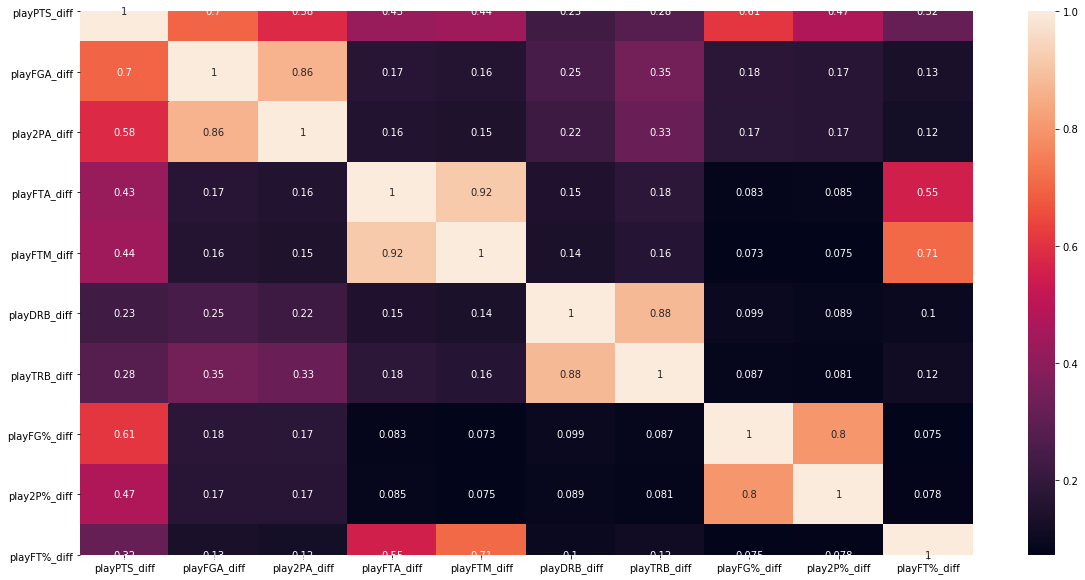

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
df_corr = selected_X_train[correlated_cols].corr(method = 'spearman')
sns.heatmap(df_corr, annot = True)


From here we can identify those features that are highly correlated. The lighter the color, the higher the correlation.

1. playFTA_diff, playFTM_diff 0.92
2. playDRB_diff, playTRB_diff 0.88
3. play2PA_diff, playFGA_diff 0.86
4. playFG%_diff, play2P%_diff 0.80

If we try various permutations of removing one or more of our availability features, to see if we suffer a significant from from our original score of 0.74

In [56]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playFTA_diff','playFTM_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playFTA_diff','playFTM_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7433625148962818

In [64]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playFG%_diff','play2P%_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playFG%_diff','play2P%_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7433916907325095

By testing the drop after scores, we could decide to drop these features without hurting the model:
['playFTA_diff','playFTM_diff','playFG%_diff','play2P%_diff']

In [65]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playFTA_diff','playFTM_diff','playFG%_diff','play2P%_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playFTA_diff','playFTM_diff','playFG%_diff','play2P%_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7403394102018417

In [66]:
selected_X_train = selected_X_train.drop(columns = ['playFTA_diff','playFTM_diff','playFG%_diff','play2P%_diff'])
selected_X_val = selected_X_val.drop(columns = ['playFTA_diff','playFTM_diff','playFG%_diff','play2P%_diff'])

### Working with Dendrograms

CPU times: user 1min 13s, sys: 5.13 s, total: 1min 18s
Wall time: 38.5 s


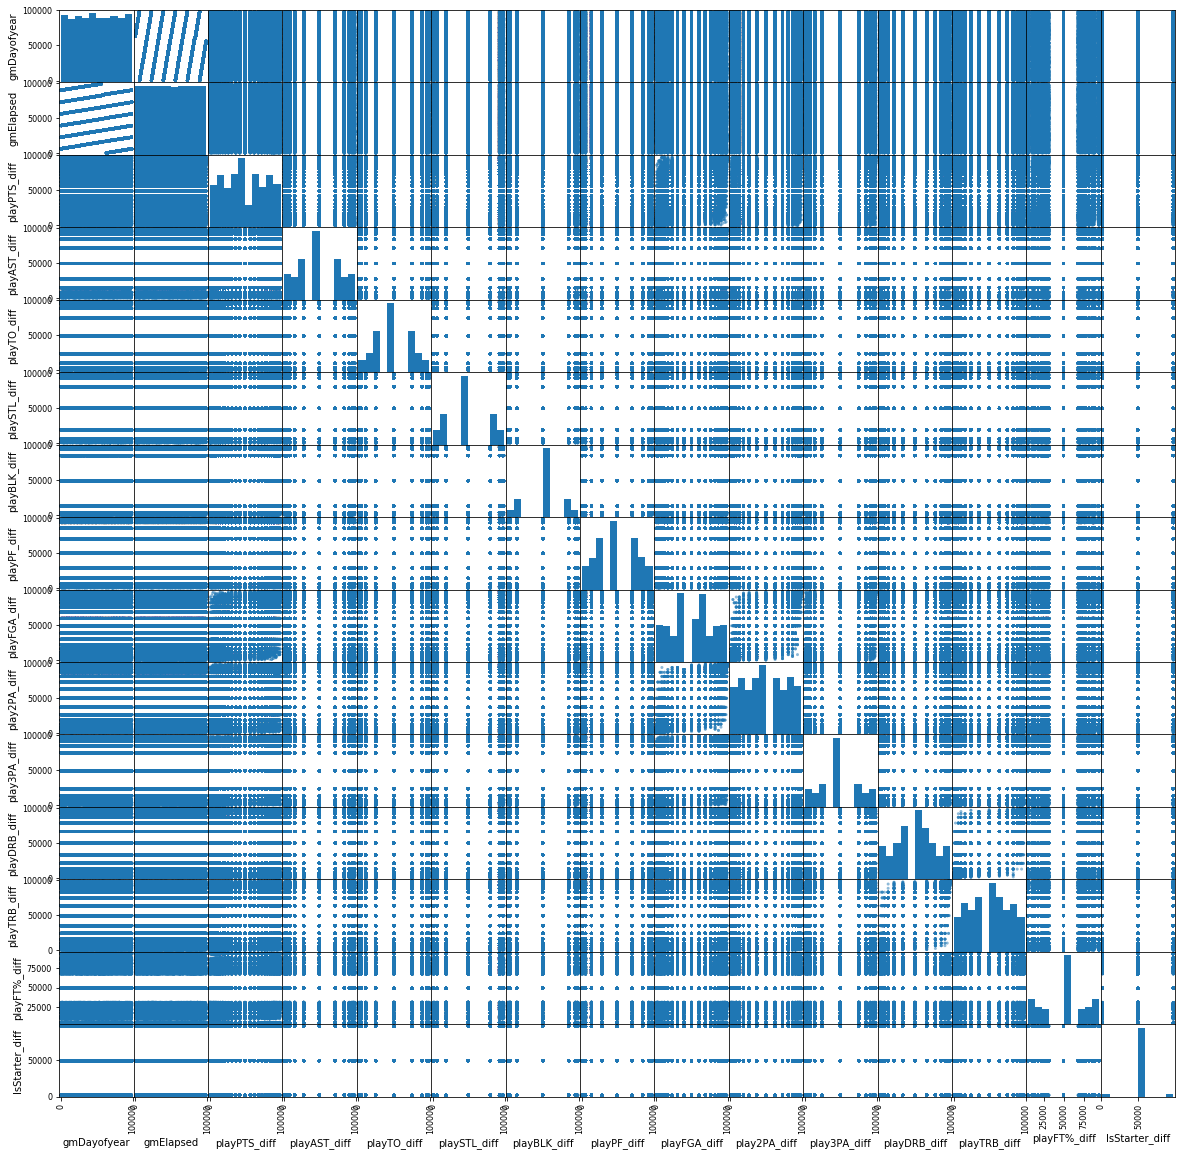

In [69]:
%%time
plot = pd.plotting.scatter_matrix(selected_X_train.rank(),figsize=(20, 20))

CPU times: user 1.53 s, sys: 12.5 ms, total: 1.54 s
Wall time: 1.55 s


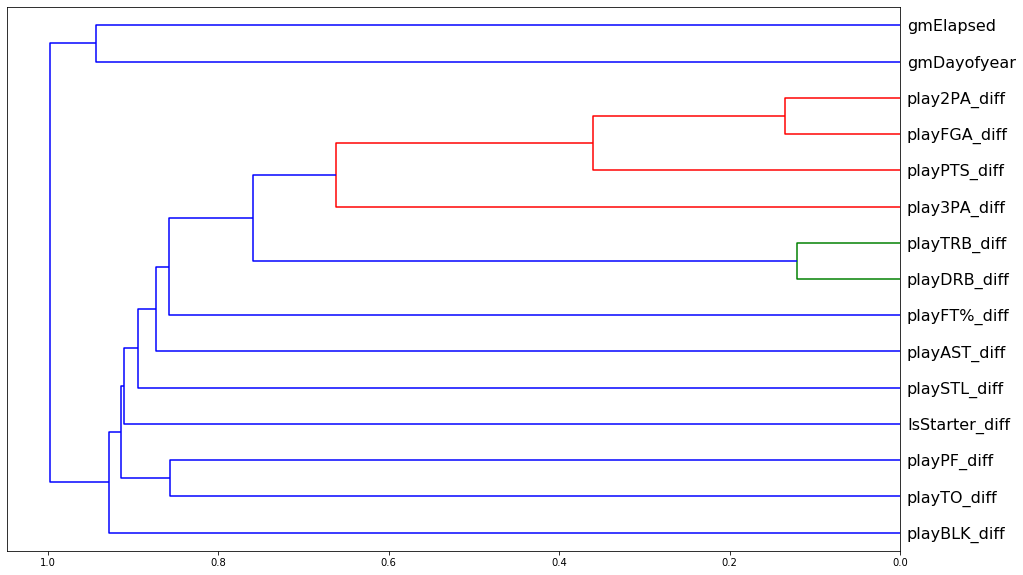

In [68]:
%%time
import scipy.cluster.hierarchy as hc
corr = selected_X_train.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = list(selected_X_train.columns), orientation = 'left', leaf_font_size=16)

Looking at the dendrogram above, we should either remove some features to see how score drop from 0.74

In [70]:
df_dropped_avail_train = selected_X_train.drop(columns = ['play2PA_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['play2PA_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7442274134474574

In [71]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playTRB_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playTRB_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7376795018562354

In [72]:
df_dropped_avail_train = selected_X_train.drop(columns = ['playDRB_diff'])
df_dropped_avail_val = selected_X_val.drop(columns = ['playDRB_diff'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7343635354762101

After several trial, we could drop these columns:

play2PA_diff','playTRB_diff','gmElapsed'

In [77]:
df_dropped_avail_train = selected_X_train.drop(columns = ['play2PA_diff','playTRB_diff','gmElapsed'])
df_dropped_avail_val = selected_X_val.drop(columns = ['play2PA_diff','playTRB_diff','gmElapsed'])

rfr_dropped_avail = RandomForestRegressor(n_estimators=6, max_features=0.5)
rfr_dropped_avail.fit(df_dropped_avail_train, y_train)
rfr_dropped_avail.score(df_dropped_avail_val, y_val)

0.7326410819046022

CPU times: user 1.14 s, sys: 15.8 ms, total: 1.15 s
Wall time: 1.16 s


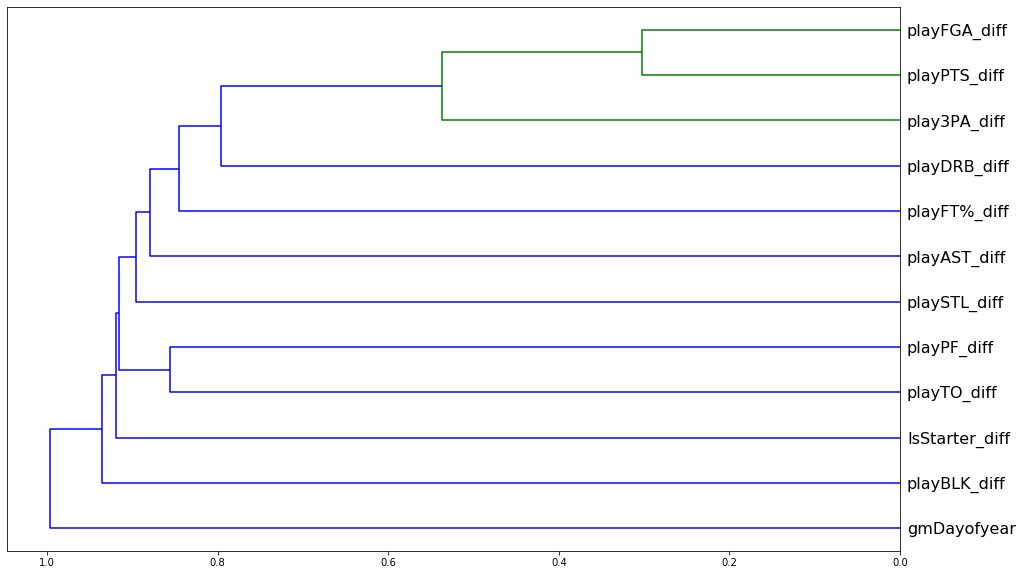

In [78]:
%%time
import scipy.cluster.hierarchy as hc
corr = df_dropped_avail_train.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = list(df_dropped_avail_train.columns), orientation = 'left', leaf_font_size=16)

After removing those high correlated features, we could now see the hierarchical clustering through Dendrograms. 

Applying with the knowledge of NBA, we could divide the features that predicts the playmin difference into two groups:

1. gmDayofyear: has high correlation with gmElapsed, indicating the time between games
2. other features: personal ability in general

In [90]:
df_dropped_avail_train.columns

Index(['gmDayofyear', 'playPTS_diff', 'playAST_diff', 'playTO_diff',
       'playSTL_diff', 'playBLK_diff', 'playPF_diff', 'playFGA_diff',
       'play3PA_diff', 'playDRB_diff', 'playFT%_diff', 'IsStarter_diff',
       'playMin_diff'],
      dtype='object')

In [80]:
df_dropped_avail_train.loc[:, 'playMin_diff'] = y_train

df_dropped_avail_val.loc[:, 'playMin_diff'] = y_val

df_dropped_avail_train.to_feather('./train_removed_corr.feather')
df_dropped_avail_val.to_feather('./val_removed_corr.feather') 